# Choosing and combining kernels
This notebook describes the various primitive kernels and kernel combinators available in Markovflow.

## Matern kernels
Matern kernels are the default kernels to use in Markovflow.

### Matern 1/2

Matern 1/2 has the following definition:

$k(x, x^{\prime})=\sigma^2 \exp \left(-\frac{(x-x^{\prime})^{2}}{2 l^{2}}\right)$

where $l$ is the lengthscale kernel parameter, and $\sigma^2$ is the variance kernel parameter.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from markovflow.kernels import Matern32, Matern12, Matern52


LENGTH_SCALE = 2.
VARIANCE = 1.
JITTER = 1e-6
OBSERVATION_NOISE_VARIANCE = 1e-2

def sample(kernel, num_samples):
    np.random.seed(1234)
    X = np.linspace(0, 100, 100)
    ssm = kernel.state_space_model(tf.constant(X))
    samples = ssm.sample(num_samples).numpy()

    Ys = samples[..., 0].T
    return X, Ys

2022-07-26 11:50:35.732018: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.7.13/x64/lib
2022-07-26 11:50:35.732053: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-07-26 11:50:40.248643: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-26 11:50:40.248835: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.7.13/x64/lib
2022-07-26 11:50:40.248846: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-26 11:50:40.248866: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az99-674): /proc/driver/nvidia/version does not exist
2022-07-26 11:50:40.249140: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FM

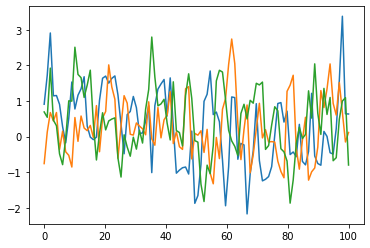

In [2]:
matern12 = Matern12(lengthscale=LENGTH_SCALE, variance=VARIANCE, jitter=JITTER)

X, Ys = sample(matern12, 3)
plt.plot(X, Ys)
plt.show()

### Matern 3/2

Matern3/2 has the following definition:

$k(x, x^{\prime})=\sigma^{2}\left(1+\frac{\sqrt{3}|x-x^{\prime}|}{l}\right) \exp \left(-\frac{\sqrt{3}|x-x^{\prime}|}{l}\right)$

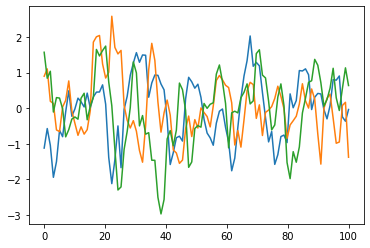

In [3]:
matern32 = Matern32(lengthscale=LENGTH_SCALE, variance=VARIANCE, jitter=JITTER)

X, Ys = sample(matern32, 3)
plt.plot(X, Ys)
plt.show()

### Matern 5/2

Matern 5/2 has the following definition:

$k(x, x^{\prime})=\sigma^{2}\left(1+\frac{\sqrt{5}|x-x^{\prime}|}{l}+\frac{5|x-x^{\prime}|^{2}}{3 l^{2}}\right) \exp \left(-\frac{\sqrt{5}|x-x^{\prime}|}{l}\right)$

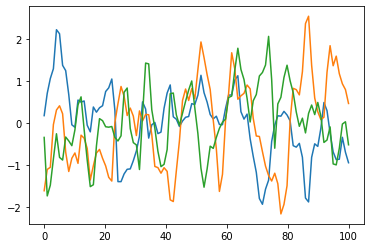

In [4]:
matern52 = Matern52(lengthscale=LENGTH_SCALE, variance=VARIANCE, jitter=JITTER)

X, Ys = sample(matern52, 3)
plt.plot(X, Ys)
plt.show()

### Stationary kernels


Matern kernels are stationary. A kernel is stationary if the joint distribution between $f(x)$ and $f(x^{\prime})$ is the same as the joint distribution $f(x+Δ)$ and $f(x^{\prime}+Δ)$. $x$ and $x^{\prime}$ are some arbitrary locations. $Δ$ is an arbitrary real number. $f(x)$ is the random variable that represents the possible values of the underlying function at location $x$. $f(x^{\prime})$ is the random variable that represents the possible values of the underlying function at location $x^{\prime}$.

An equivalent definition of a stationary kernel is: when the kernel is a function of $x-x^{\prime}$, it is a stationary kernel.


### Which Matern should I use?

Pick a Matern kernel that is consistent with some property of the data that you have. If you are modelling stock prices, the price time series is not smooth, so a Matern1/2 kernel might be a better choice than a Matern5/2. On the other hand, if you are are modelling temperature during a day, which is a smooth series, a Matern3/2 or Matern5/2 kernel might be better than a Matern1/2 kernel.

You can also draw samples from the corresponding prior with your best guesses for the hyperparameter values, and compare the look-and-feel of those samples with your data.

## Constant kernel

$k(x, x^{\prime}) = \sigma^2$

The constant kernel is another stationary kernel. Samples from a constant kernel appear as horizontal straight lines.

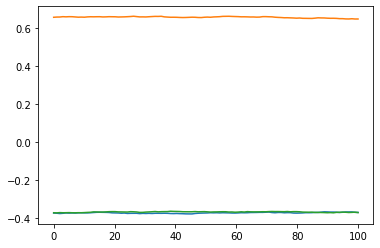

In [5]:
from markovflow.kernels.constant import Constant

constant = Constant(variance=VARIANCE, jitter=JITTER)

X, Ys = sample(constant, 3)
plt.plot(X, Ys)
plt.show()

### Why samples from a GP with constant kernel are horizontal straight lines

For a zero-meaned GP with a constant kernel $k(x, x^{\prime})=\sigma^2$, we can define the following equivalent process:

$$f(x) = \eta
$$

where $\eta \sim \mathcal{N}(0, \sigma^2)$.

To verify that $f(x)$ defined this way has the same distribution as our zero-meaned GP with a constant kernel, we verify that:

1. the mean of $f(x)$ for an arbitrary value of $x$ is 0.
2. the covariance between $f(x)$ and $f(x^{\prime})$ for arbitrary values of $x$ and $x^{\prime}$, denoted by $cov(f(x), f(x^{\prime}))$, equals $\sigma^2$.

Verify the mean:

Because $f(x)=\eta$, and $\eta \sim \mathcal{N}(0, \sigma^2)$, so $f(x)$ has zero mean.

Verify the covariance:

$\begin{align}
cov(f(x), f(x^{\prime})) &= \mathbb{E}\left[(\eta - 0)(\eta - 0)\right] \\
&= cov(\eta, \eta) \\
&= \sigma^2 \\
\end{align}$

Indeed $f(x)=\eta$ is equivalent to our zero-meaned GP with a constant kernel. In other words, $f(x)=\eta$ models the same set of functions as the GP does. From $f(x)=\eta$, it is obvious that these functions are horizontal lines. And the model parameter $\sigma^2$ decides the possible y-axis locations of those horizontal lines.



### Why the constant kernel is useful

From looking at the kernel samples figures, it is not obvious why the constant kernel is useful. It is better to understand its use case from the predictive distribution for test location $X_*$. Let's assume that there is no observation noise.

The following equation shows the joint distribution between the latent random variable $f(X_*)$ and the observation random variable $y(X)$:

$\begin{bmatrix}f(X_*)\\y(X)\end{bmatrix} \sim \mathcal{N}\left(0,\;\; \begin{bmatrix}k(X_*, X_*)&k(X_*, X)\\k(X_*,X)^{\top}&k(X, X)\end{bmatrix}\right)$

Apply the multivariate Gaussian conditional rule to derive the predictive distribution:

$f(X_*)|y(X) \sim \mathcal{N}\left(k(X_*, X)k(X,X)^{-1} y(X),\;\;k(X_*,X_*)-k(X_*,X)k(X,X)^{-1}k(X_*, X)^{\top}\right)$

This predictive distribution has mean:

$k(X_*, X)k(X,X)^{-1} y(X)$

After we plug in the data $Y$, we get:

$k(X_*, X)k(X,X)^{-1} Y$

Imagine that the test location $X_*$ is far from the training location $X$. If we are using a Matern kernel, $k(X_*, X)$ will be 0, and therefore the predictive mean will be 0. However, if we are using a constant kernel, $k(X_*, X)=\sigma^2$, no matter how far $X_*$ is from $X$. So the predictive mean will not be 0.

This is the use case for the constant kernel -- to modify the mean of the predictive distribution. In practice, it is more common to use the constant kernel in combination with another kernel. For more information on kernel combinators, see the **Combining kernels** section.

## HarmonicOscillator kernel

The Harmonic Oscillator kernel is a stationary periodic kernel. It has the following definition:

$k(x, x^{\prime}) = \sigma^2 cos\left(\frac{2\pi}{p} \cdot (x-x^{\prime})\right)$

It has two parameters, the variance $\sigma^2$, and the cycle period $p$ in radius unit.

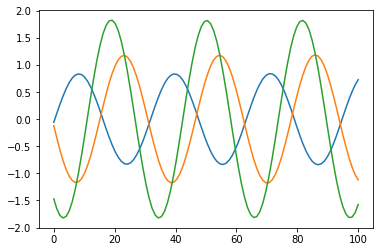

In [6]:
from markovflow.kernels.periodic import HarmonicOscillator

periodic = HarmonicOscillator(variance=VARIANCE, period=10*np.pi, jitter=JITTER)

X, Ys = sample(periodic, 3)
plt.plot(X, Ys)
plt.show()

## LatentExponentiallyGenerated kernel

The Latent Exponentially Generated kernel is a stationary kernel with identity marginal covariance.
It is specified by (1) a noise matrix N that specifies how Brownian noises is mapped into each of 
the dimensions of the state space, (2) a matrix R specifying a rotation of the state space.

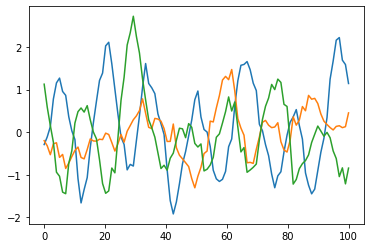

In [7]:
from markovflow.kernels.latent_exp_generated import LatentExponentiallyGenerated as LEG

state_dim = 4
N = np.random.rand(state_dim, state_dim)*0.2
R = np.random.rand(state_dim, state_dim)
leg = LEG(R=R, N=N, jitter=0)
X, Ys = sample(leg, 3)
plt.plot(X, Ys)
plt.show()

## Combining kernels

### Using the Sum kernel
$Sum(x, x^{\prime}) = k_1(x, x^{\prime}) + k_2(x, x^{\prime})$

Example: Matern5/2 + Matern1/2

The following example shows some samples from a Matern5/2 + Matern1/2 kernel: 

Instructions for updating:
Do not call `graph_parents`.


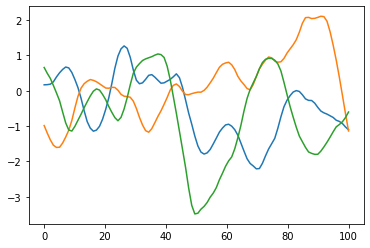

In [8]:
from markovflow.kernels.sde_kernel import Sum

sum_kernel = Sum([Matern52(lengthscale=8., variance=1., jitter=JITTER),
                  Matern12(lengthscale=2,  variance=1., jitter=JITTER)],
           jitter=JITTER)

X, Ys = sample(sum_kernel, 3)
plt.plot(X, Ys)
plt.show()

### Using the Product kernel

$Product(x, x^{\prime}) = k_1(x, x^{\prime}) \times k_2(x, x^{\prime})$


Example: Matern3/2 x Periodic

This is an interesting combination. It requires a more strict periodic characteristic for locations nearby and a less strict periodic characteristic for locations that are far away. This is because the Matern3/2 kernel gives more weight to the Periodic kernel for nearby locations and less weight to the Periodic kernel for locations that are far away. This combination is known as a **locally periodic kernel**. It generates samples like this:

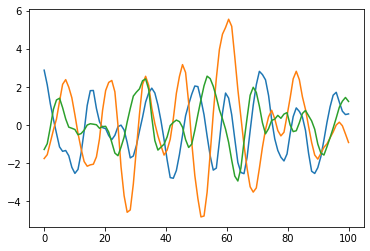

In [9]:
from markovflow.kernels.sde_kernel import Product

product = Product(
    [Matern32(lengthscale=8, variance=1., jitter=JITTER),
     HarmonicOscillator(variance=2., period=5*np.pi, jitter=JITTER)],
    jitter=JITTER)

X, Ys = sample(product, 3)
plt.plot(X, Ys)
plt.show()

### Using a state mean for the kernel

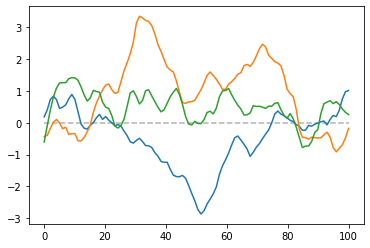

In [10]:

state_dim = 2
state_mean = tf.identity([0., 1.])
kernel = Matern32(lengthscale=8, variance=1., jitter=JITTER)
kernel.set_state_mean(state_mean)

X, Ys = sample(kernel, 3)
plt.plot(X, Ys)
plt.hlines(state_mean[0], xmin=X.min(), xmax=X.max(), ls='--', color='k', alpha=.3)

plt.show()

### Using a Piecewise Stationary kernel

$dx(t) = F_i (x(t) - \mu_i)) + L d\beta$



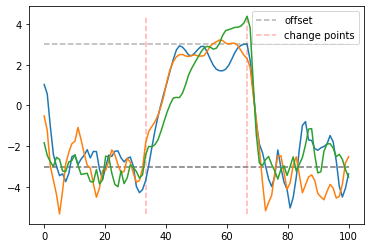

In [11]:


from markovflow.kernels.piecewise_stationary import PiecewiseKernel
from gpflow import default_float


num_inducing = 2


change_points = np.linspace(0,100,num_inducing+2)[1:-1]

base = Matern52
lengthscales = np.array([2.,6.,2.])
variances = np.array([1.,1.,1.])
state_means = np.array([[-3., 0., 0.], [3., 0., 0.], [-3., 0., 0.]])

ks = [
    base(variance=variances[l], lengthscale=lengthscales[l])
    for l in range(num_inducing + 1)
]

[k.set_state_mean(state_means[i]) for i, k in enumerate(ks)]

kernel = PiecewiseKernel(
    ks, tf.convert_to_tensor(change_points, dtype=default_float()))

X, Ys = sample(kernel, 3)
plt.plot(X, Ys)
plt.hlines(state_means[:, 0], xmin=X.min(), xmax=X.max(), ls='--', color='k', alpha=.3, label='offset')
plt.vlines(change_points, ymin=Ys.min(), ymax=Ys.max(), ls='--', color='r', alpha=.3, label='change points')
plt.legend()
plt.show()